In [1]:
import os
import sys
sys.path.insert(0, '../funzioni')
from funzioni import *
import json
import os
import sys
import re
import pandas as pd
sys.path.append('../../')

import matplotlib.pyplot as plt

## Data Ingestion Analysys

In [16]:
df_append

,company,job_title,location,company_rating,job_age,job_link,oppurtunita_carriera,stipendio_e_benefit,cultura_e_valori,dirigenti_senior,equilibrio_lavoro_vita_privata,sede_centrale,dimensioni,tipo,entrate,fondata_nel,settore,segmento,scraping_date
0,Security Smart UK,Tecnico di Cablaggio,Gioia Tauro,NaN,Oltre 30 g,https://www.glassdoor.it/partner/jobListing.ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2023-02-12
1,MeglioQuesto,Coordinatore Vendite,Sicilia,3.2,11 g,https://www.glassdoor.it/partner/jobListing.ht...,2.3,2.6,2.6,3.1,3.2,"Milano, Italia",Da 51 a 200 dipendenti,Lavoratore autonomo,Sconosciuto/Non applicabile,0,Non_disponibile,Non_disponibile,2023-02-12
2,Polidiagnostico SaDa Group,Infermiere,Messina,NaN,3 g,https://www.glassdoor.it/partner/jobListing.ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2023-02-12
3,Umana spa,Ingegnere Elettrico,Messina,3.7,3 g,https://www.glassdoor.it/partner/jobListing.ht...,3.2,3.0,3.5,3.1,2.9,"Venezia, Italia",Oltre 10.000 dipendenti,Azienda - Settore privato,$ 100 - $ 500 milioni (USD),0,Non_disponibile,Non_disponibile,2023-02-12
4,HILL - ENERGIA PER L'AMBIENTE,Rappresentante Commerciale,Reggio di Calabria,2.0,Oltre 30 g,https://www.glassdoor.it/partner/jobListing.ht...,1.0,5.0,1.0,1.0,5.0,"Martellago, Italia",Sconosciuto,Azienda quotata in borsa,Sconosciuto/Non applicabile,0,Non_disponibile,Non_disponibile,2023-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,SAGRES SRL,Impiegato Ufficio Amministrativo,Napoli,1.7,Oltre 30 g,https://www.glassdoor.it/partner/jobListing.ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2023-02-14
11699,Hill Srl,Rappresentante Commerciale,Napoli,2.0,Oltre 30 g,https://www.glassdoor.it/partner/jobListing.ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2023-02-14
11700,Assist Digital Spa,Operatore di Call Centre,Vitulazio,3.7,13 g,https://www.glassdoor.it/partner/jobListing.ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2023-02-14
11701,DG NET WORK SRL,Ingegnere Meccanico,Salerno,NaN,17 g,https://www.glassdoor.it/partner/jobListing.ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2023-02-14


In [10]:
import pandas as pd
import os
df_append = pd.DataFrame()
path = '../data'
file_list = os.listdir(path)
file_da_escludere = ['data_backup', 'company_overview.csv', 'jobs']
file_list = list(set(file_list) - set(file_da_escludere))
for e in file_list:
    file_path = path + '/' + e
    df = pd.read_csv(file_path).drop_duplicates().reset_index(drop=True)
    df_append = df_append.append(df).drop_duplicates().reset_index(drop=True)
dfr = df_append
df_1 = df_append.groupby(['scraping_date'])[['job_link']].count().reset_index().rename(columns={'job_link':'total_rows'})
df_2 = df_append[df_append['oppurtunita_carriera'].isna()].\
groupby(['scraping_date'])[['job_link']].count().reset_index().rename(columns={'job_link':'ko_schedevalutazione'})
df_eval = df_1.merge(df_2, on = 'scraping_date')
df_eval['ratio'] = df_eval['ko_schedevalutazione']/df_eval['total_rows']*100

/tmp/ipykernel_24781/1487259153.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df).drop_duplicates().reset_index(drop=True)
/tmp/ipykernel_24781/1487259153.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df).drop_duplicates().reset_index(drop=True)
/tmp/ipykernel_24781/1487259153.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df).drop_duplicates().reset_index(drop=True)
/tmp/ipykernel_24781/1487259153.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df).drop_duplicates().reset_index(drop=True)
/tmp/ipy

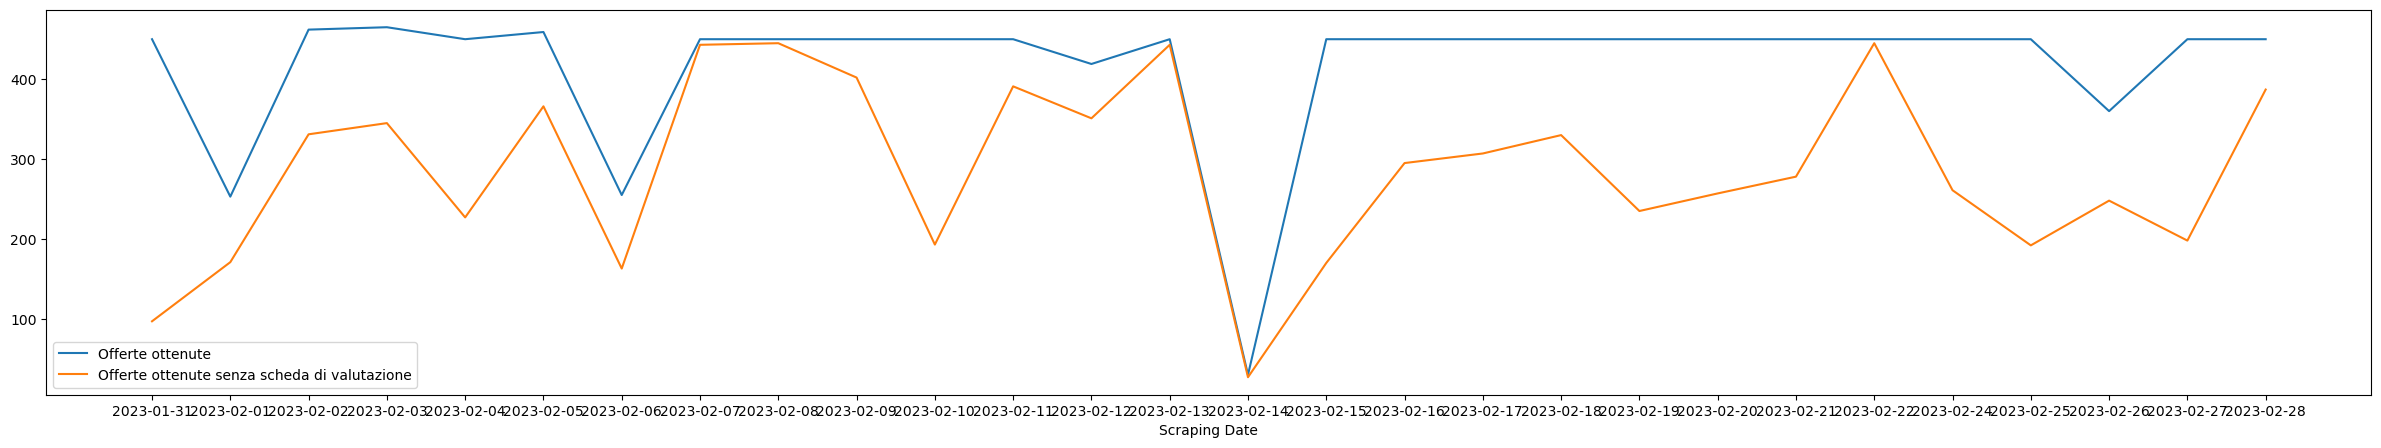

In [13]:
fig, ax = plt.subplots(figsize=(30, 5))

ax.plot(df_eval['scraping_date'], df_eval['total_rows'], label='Offerte ottenute')
ax.plot(df_eval['scraping_date'], df_eval['ko_schedevalutazione'],  label='Offerte ottenute senza scheda di valutazione')
#ax2 = plt.twinx()
#ax.plot(df_eval['scraping_date'], df_eval['ratio'], color='red', label='ratio')
#ax.plot(df_eval['scraping_date'], df_eval['ratio'], 'ro' label='Offerte ottenute senza scheda di valutazione')

plt.xlabel('Scraping Date')
#plt.ylabel('ko_schedevalutazione ')
#plt.title('Grafico a linee')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


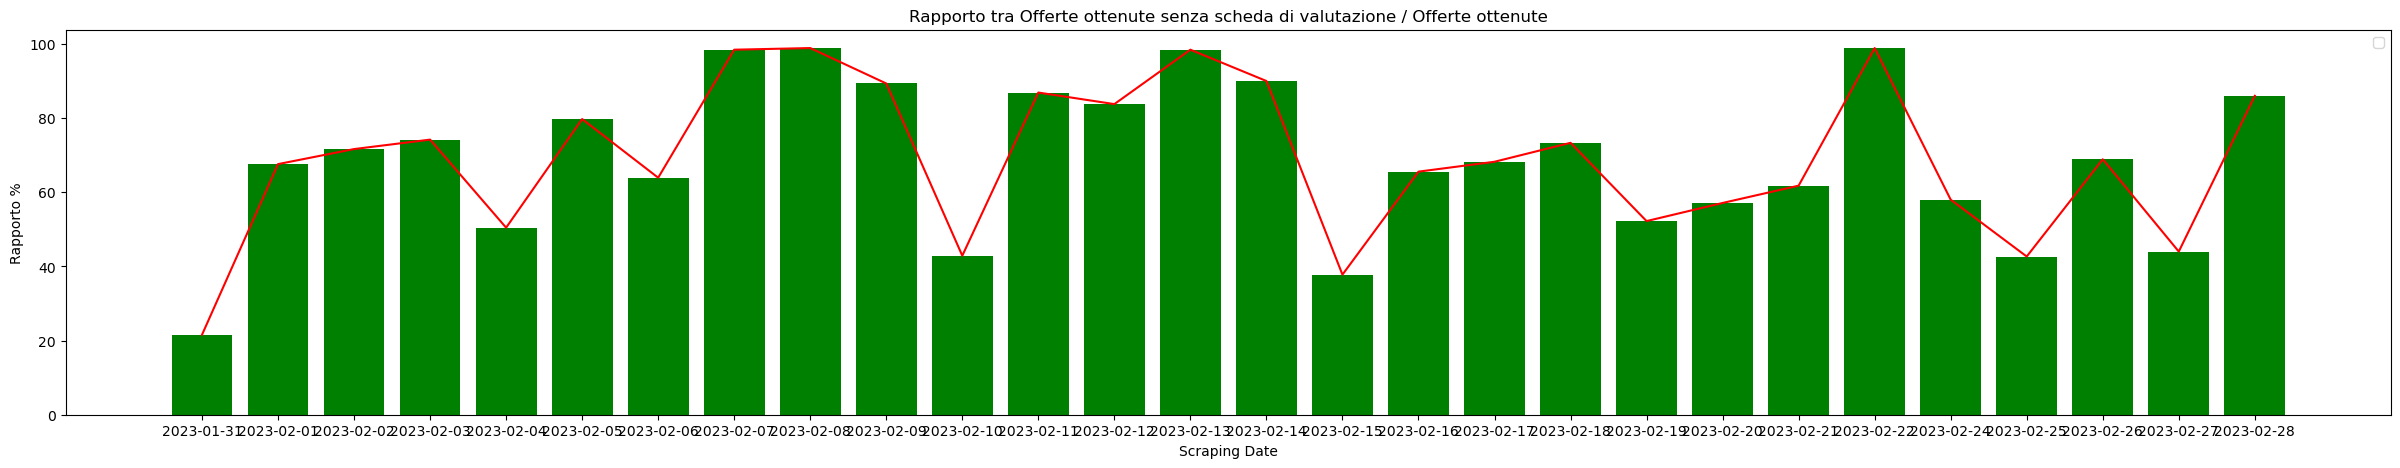

In [14]:
fig, ax = plt.subplots(figsize=(30, 5))

ax.bar(df_eval['scraping_date'], df_eval['ratio'], color='green')
ax.plot(df_eval['scraping_date'], df_eval['ratio'], color='red')

plt.xlabel('Scraping Date')
plt.ylabel('Rapporto %')
plt.title('Rapporto tra Offerte ottenute senza scheda di valutazione / Offerte ottenute')


plt.legend()
plt.show()

## Data quality run

In [ ]:
run_dataq()

In [ ]:
df  = parse_json()
df1 = df[df['expectation_type'] != 'expect_table_columns_to_match_ordered_list'].iloc[:,:-3][['scraping_date','column','expectation_type','element_count','unexpected_percent', 'unexpected_percent_nonmissing', 'missing_percent']]
df_scrapingdate = df1.groupby(['scraping_date','expectation_type']).agg({'element_count':max,'unexpected_percent':'mean', 'unexpected_percent_nonmissing':'mean', 'missing_percent':'mean' }).reset_index()
df_scrapingdate.head()

In [ ]:
fig, ax = plt.subplots()

# Cicla attraverso le colonne uniche del dataframe
for col in df_scrapingdate['expectation_type'].unique():
    # Seleziona solo le righe del dataframe corrispondenti alla colonna attuale
    sub_df = df_scrapingdate[df_scrapingdate['expectation_type'] == col]
        
    # Traccia una linea per il numero di elementi per data di scraping
    ax.plot(sub_df['scraping_date'], sub_df['unexpected_percent_nonmissing'], label=col+' - unexpected_percent_nonmissing')
    # Traccia una linea per la percentuale di valori imprevisti per data di scraping
    #ax.plot(sub_df['scraping_date'], sub_df['unexpected_percent'], label=col+' - Unexpected Percent')
    # Traccia una linea per la percentuale di valori mancanti per data di scraping
    #ax.plot(sub_df['scraping_date'], sub_df['missing_percent'], label=col+' - Missing Percent')

# Aggiungi legenda, etichette degli assi e titolo del grafico
#ax.legend()

ax.set_xlabel('Scraping Date')
ax.set_ylabel('Count/Percent')
ax.set_title('Count and Percent by Column and Scraping Date')

# Mostra il grafico
plt.show()